# Section Outline

- S&P500 (a very famous portfolio)
- Risk; and how diversification mitigates risk
- Mean (expected return) and Variance of a portfolio 
- Mean-Variance Optimization
- Linear and Quadratic Programming
    - Constrained optimization; e.g. constraint = can't invest more than 100% of wealth
- Efficient frontier, Sharpe Ratio, Capm, and more!

# Portfolio Theory

- Stock returns are random
- We don't (usually) ask "What will the next 1- coin tosses be?"
- Better question: "How are coin tosses distributed?"
- Are some coins correlated with other coins?
- Can we exploit those relationships to optimally allocate resources?

## Predicting Stock Returns

- Think of the prediction as the *expected return* in the future
- The question isn't *will* you be wrong, but *how* wrong 
- If your prediction is 10%, and the realized return is 9% - that isn't bad.
- If the realized return is -20% - that really bad!
- Standard deviation tells you how much the return will *deviate* from its expected value (how bad your prediction will be)
- We can use the Standard deviation as a *risk* amount in determining wheather or not to enter/exit a stock.


## Diversification

- 2 stocks with the same expected return and risk
- Smaller risk investing in both
- Variance goes down by a factor of 1/2
- Because they're independent, what happens with one stock will *not* affect the other



## Describing a Portfolio

- This process must be done before "optimizing" a portfolio 
- **Weights** tell us the proportion of each asset in our portfolio 
- E.g. Apple, Google, Starbucks, & IBM
- `$10,000 investment`
- `$2,500 in AAPL, $5,000 in GOOG, $1,500 in SBUX, $1000 in IBM`
- The corresponding weights are `0.25, 0.5, 0.15, 0.1`



<br/>

# Visualizing Random Portfolios and Monte Carlo Simulation

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
np.random.seed(11111111)

In [2]:
# Expected returns for a fake portfolio

mean_return = 0.01 * np.random.randn(2)
mean_return

array([-0.00798242,  0.00181554])

In [3]:
# Generating a random correlation between the two stocks (exp. returns)

rho = 0.01 * np.random.randn()
rho

0.007129547452251222

In [4]:
# Standard deviation for the two stocks (assured to be positive)

sigmas = np.exp(np.random.randn(2))
sigmas

array([2.83423006, 0.50425457])

In [5]:
# Create the covariance matrix (diaginals)

cov = np.diag(sigmas**2)
cov

array([[8.03286002, 0.        ],
       [0.        , 0.25427267]])

In [6]:
# Fill in the non-diaginals of cov - matrix is symetrical so the same value can be used for both spots

sigma12 = sigmas[0] * sigmas[1] * rho
cov[0,1] = sigma12
cov[1,0] = sigma12
cov

array([[8.03286002, 0.01018936],
       [0.01018936, 0.25427267]])

In [7]:
# A function to generate Random, Positive Portfolio Weights

def softmax(w):
    a = np.exp(w)
    return a / a.sum()

In [8]:
# Creating a bunch of random portfolio's - Calculating their Returns and Risk before Plotting
N = 1000
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
    w = softmax(np.random.randn(2))
    ret = mean_return.dot(w)
    risk = np.sqrt(w.dot(cov).dot(w))
    returns[i] = ret
    risks[i] = risk 

Text(0.5, 1.0, 'Portfolio possiblities between stocks with returns\n[-0.00798242,  0.00181554]\nPurchase Only')

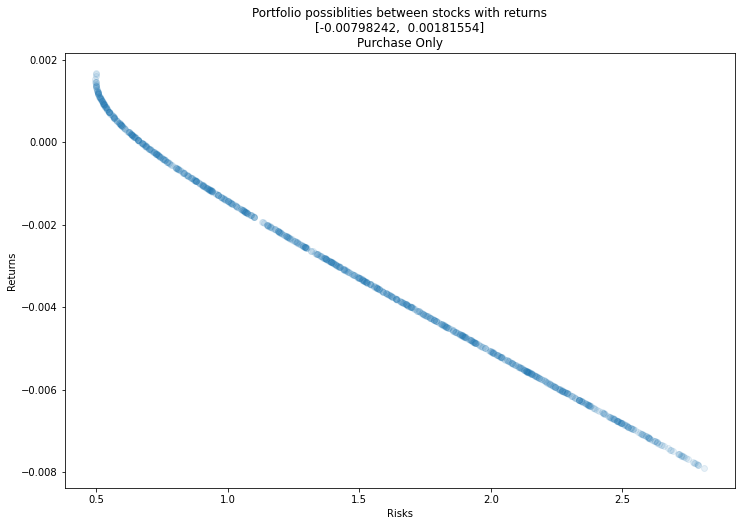

In [12]:
# Plotting the random portfolios between the two original (random) stocks

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(risks, returns, alpha=0.1)
plt.xlabel("Risks")
plt.ylabel("Returns")
plt.title("Portfolio possiblities between stocks with returns\n[-0.00798242,  0.00181554]\nPurchase Only")

Text(0.5, 1.0, 'Portfolio possiblities between stocks with random returns\nShort-Sell Allowed')

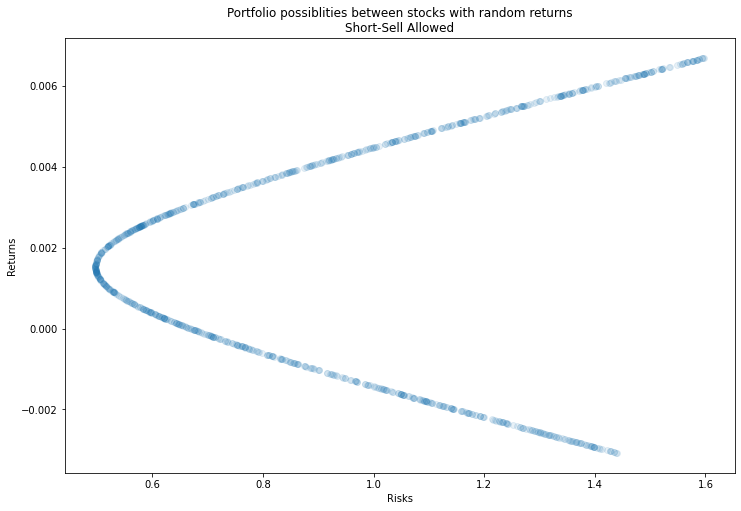

In [16]:
# Random portfolios again but ALLOWING SHORT-SELLING and new random weights
N = 1000
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
  x = np.random.random() - 0.5
  w = np.array([x, 1-x]) # short-selling allowed
  ret = mean_return.dot(w)
  risk = np.sqrt(w.dot(cov).dot(w))
  returns[i] = ret
  risks[i] = risk

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(risks, returns, alpha=0.1)
plt.xlabel("Risks")
plt.ylabel("Returns")
plt.title("Portfolio possiblities between stocks with random returns\nShort-Sell Allowed")

---

<br/>

## 3-Asset Portfolio

In [17]:
# Generate 3 "stock" returns from random

mean_return = 0.01 * np.random.randn(3)
mean_return

array([-0.00064955,  0.00741576,  0.00212649])

In [18]:
sigmas = np.exp(np.random.randn(3))
sigmas

array([1.69789011, 1.71011141, 1.21562373])

In [19]:
rhos = 0.01 * np.random.randn(3)
rhos

array([0.01169218, 0.00337099, 0.0103307 ])

In [20]:
# Combine the sigmasa and rhos to create covarriance matrix

cov = np.array([
  [sigmas[0]**2, rhos[0]*sigmas[0]*sigmas[1], rhos[1]*sigmas[0]*sigmas[2]],
  [rhos[0]*sigmas[0]*sigmas[1], sigmas[1]**2, rhos[2]*sigmas[1]*sigmas[2]],
  [rhos[1]*sigmas[0]*sigmas[2], rhos[2]*sigmas[1]*sigmas[2], sigmas[2]**2],
])
cov

array([[2.88283083, 0.0339492 , 0.00695771],
       [0.0339492 , 2.92448103, 0.021476  ],
       [0.00695771, 0.021476  , 1.47774105]])

In [21]:
# Generating the random portfolios

N = 1000
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
  # generating the weights
  x1, x2 = np.random.random(2) - 0.5
  w = np.array([x1, x2, 1 - x1 - x2]) # short-selling allowed   - sums to 1
  
  np.random.shuffle(w)  # balancing the weights
  ret = mean_return.dot(w)
  risk = np.sqrt(w.dot(cov).dot(w))
  returns[i] = ret
  risks[i] = risk

Text(0.5, 1.0, "1000 random, 3-Asset, Portfolio's\nReturns/Risk")

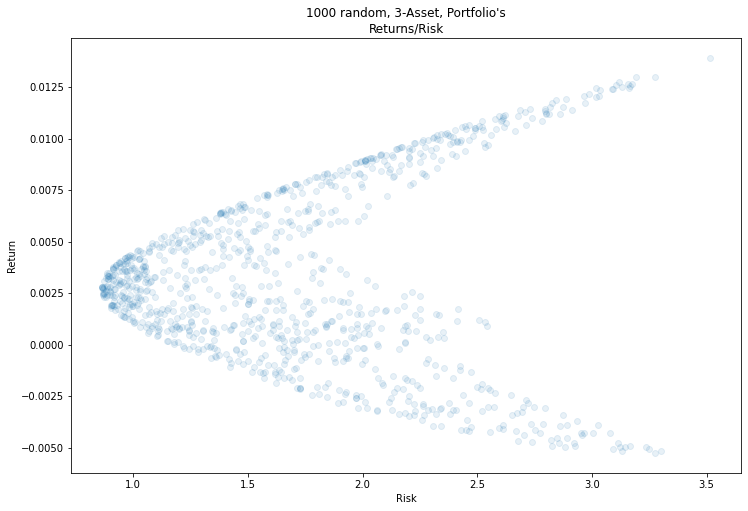

In [23]:
# Plot the 3-asset portfolios

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(risks, returns, alpha=0.1)
plt.xlabel("Risk")
plt.ylabel("Return")
plt.title("1000 random, 3-Asset, Portfolio's\nReturns/Risk")